# Discards

Streamgraphs relevant links
https://www.python-graph-gallery.com/streamchart/
https://rud.is/b/2015/03/12/streamgraph-htmlwidget-version-0-7-released-adds-support-for-markers-annotations/

In [ ]:
# Ranking plots by word in p_dem and p_rep

p_dem, dict_rank_dem = CreateRankingPlot(list4['dem'], controversy_topics)
p_rep, dict_rank_rep = CreateRankingPlot(list4['rep'], controversy_topics)

List_of_plots = []

for j,wj in enumerate(controversy_topics):
    x_dem = dict_rank_dem['x'][j]
    y_dem = dict_rank_dem['y'][j]
    word_dem = dict_rank_dem['word'][j]

    x_rep = dict_rank_rep['x'][j]
    y_rep = dict_rank_rep['y'][j]
    word_rep = dict_rank_rep['word'][j]

    pj = figure(plot_width= 280, plot_height=60,title = None)
    pj = empty_canvas(pj)
    pj.background_fill_color = 'seashell'
    
    pj.line(x=x_dem, y=y_dem, line_color = cdem, line_width = 2)
    pj.line(x=x_rep, y=y_rep, line_color = crep, line_width = 2)
    
    pj.text(x='x', y= 'y', text = 'text',source = ColumnDataSource({'x':[1], 'y':[9],'text':[word_rep]}))
    
    List_of_plots.append(pj)

show(gridplot(List_of_plots,ncols = 3))

In [ ]:
# JOY DIVISION PLOT

bar ={} # bar-information for plotting

p = figure(plot_width=560, plot_height=1000, title = '2020 word evolution',
           tools = '', tooltips = '', x_range=(-90,365), x_axis_type = 'linear')

dict_points = {}
s = 0.005 #scale factor
sb = 4e-5
S = []
for i, word_i in enumerate(controversy_topics):
    
    y_i = datest[word_i]
    
    y_i = datest[''.join([word_i,'_ks'])]
    # Normalized?
    y_i = [y/sum(y_i) for y in y_i]
    #y_i = [(y-min(y_i))/(max(y_i) - min(y_i)) for y in y_i]

    y_i_half = [s*y/2 for y in y_i]
    x_i = datest.index.tolist()
    bsln = i
    
#     y_plus = [bsln + y for y in y_i_half]
#     y_minus = [bsln - y for y in y_i_half]
    
#     source = ColumnDataSource(dict(x=x_i, y1=y_minus, y2=y_plus))
    
#     p.vbar(bottom = 'y1', top='y2',x = 'x', source = source, color = '#997a8d', alpha = 1, width = 1)
#     p.step(x='x', y='y1', source = source, color = 'seashell', mode = 'center')
#     p.step(x='x', y='y2', source = source, color = 'seashell', mode = 'center')
    
#     p.line(x='x', y='y1', source = source, color = 'seashell')
#     p.line(x='x', y='y2', source = source, color = 'seashell')
#     p.varea(y1 = 'y1', y2 ='y2',x = 'x', source = source, color = '#997a8d', alpha = 1)


    S.append(bsln*sb)
    
    y_i_off = [s*y+bsln*sb for y in list(y_i)]
    dict_points[word_i] = y_i_off
    
    source = ColumnDataSource(dict(x=x_i, y1=y_i_off))
    
    bar[word_i] = p.line(x='x', y='y1', source = source, color = c3, line_width = 1.2)
    p.scatter(x=[0], y = [y_i_off[0]], color = c3, size = 5)
    
    selected_line = Line(line_alpha=1, line_color=c3, line_width = 3)

    # I add the selection glyph because I want to fix a particular line for comparing
    bar[word_i].hover_glyph = selected_line

    
Events = [7,20,24,73,106,285,308,343]
event_lines = []
for event in Events:
    event_lines.append(Span(location=event, dimension='height', line_color='green',
                            line_width=0.5, line_dash = 'dotted', level = 'underlay'))
    p.renderers.extend(event_lines)
    
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

month_length = [31,28,31,30,31,30,31,31,30,31,30,31]
tick_months = [1] + list(np.cumsum(month_length))
x_major_ticknames = {int(j):x for j,x in zip(tick_months[:-1], month_names)}
x_major_ticknames[365] = ''
tick_minor = [(x + tick_months[i+1])/2 for i,x in enumerate(tick_months[:-1])]
x_minor_ticknames = {int(j):x for j,x in zip(tick_minor, month_names)}    

p.ygrid.ticker = [sb*x for x in range(len(controversy_topics))]
p.ygrid.grid_line_color = 'darkgrey'
p.ygrid.grid_line_width = 1

p.xgrid.ticker = tick_months
p.xgrid.grid_line_dash = 'dotted'
p.xgrid.visible = False

p.xaxis.visible = False
p.yaxis.visible = False

p.outline_line_color = None
p.outline_line_dash = 'solid'
p.outline_line_width = 1
p.background_fill_color = 'seashell'
p.border_fill_color = None


dfwords = pd.DataFrame({'x' : [-4 for _ in token_names], 'y' : S,'word' : token_names})
glyph_text = Text(x='x', y='y', text="word", 
                  x_offset = 0, y_offset = 0, 
                  text_align = 'right', text_baseline = 'bottom', 
                  angle=0, text_font_size = '14pt', text_color=c3, text_alpha = 1, text_font_style = 'bold')
r_text = p.add_glyph(ColumnDataSource(data=dfwords), glyph_text)


dfhey = pd.DataFrame({'x' : [365/2], 'y' : np.max(y_i_off),'word' : '(Hover to highlight the lines!)'})
glyph_hey = Text(x='x', y='y', text="word", 
                  x_offset = 0, y_offset = 10, 
                  text_align = 'center', text_baseline = 'top', 
                  angle=0.2, text_font_size = '14pt', text_color=c3, text_alpha = 1, text_font_style = 'normal')
p.add_glyph(ColumnDataSource(data=dfhey), glyph_hey)

show(p)

In [450]:

WORDS_IN_TOPIC = smooth_data.columns.tolist()

red = Color("dodgerblue")
colors_ = [c.hex for c in list(red.range_to(Color("hotpink"), len(token_names)))]


nweeks = smooth_data.shape[0]
items = [] # items for legend
bar ={} # bar-information for plotting
weeks = x_period # adding 1 to 0:23 for readibiltiy

tooltips = [("word", "$name")]
tools_to_show = 'box_zoom,hover,reset,tap'

p = figure(plot_width=1000, plot_height=400, title = 'Evolution of words in topic i',
           tools = tools_to_show, tooltips = tooltips, x_axis_type="datetime")

dates = smooth_data.index.to_list()
for indx, wi in enumerate(token_names):
    
    word_i = '_'.join([wi,'ks'])
     # Selecting hour and probabilities for plotting category i
    probs = smooth_data[word_i].to_list()
     # adding bar for category i
    bar[word_i] = p.line(x = dates, y = probs, muted_color = colors_[indx], muted_alpha = 0.4, muted = True,
                         color = colors_[indx], alpha = 1, line_width = 1.5, name = word_i)
    
    selected_line = Line(line_alpha=1, line_color=colors_[indx], line_width = 2.5)

    # I add the selection glyph because I want to fix a particular line for comparing
    bar[word_i].hover_glyph = selected_line
    bar[word_i].selection_glyph = selected_line
        
# Adding info of category i for the legend
    items.append((wi, [bar[word_i]]))

 # Adjusting plot parameters
p.x_range.range_padding = 0.05
#p.xaxis.axis_label = "Week of the year"
p.yaxis.axis_label = "Probability of using the word"
 # Adusting legend information
legend = Legend(items=items, location=(0, 10))
p.add_layout(legend, 'right')
p.legend.click_policy="hide"

show(p) 

In [ ]:
def ReturnCoocMat(t_m, wl):
    
    # Returns a N-square matrix where N is the number of words of a topic.
    # The matrix diagonal is always 1
    # The matrix is symetric
    
    # When the word i is said, how many times j is said.

    from collections import Counter
    
    nwl = len(wl)
    mat = np.zeros((nwl,nwl))
    
    tokens_tm = tokenizer(t_m)
    c = Counter(x for x in tokens_tm if x)
    # selecting only the topic words
    c_topic = Counter({k: 0  for k in wl})
    
    c_topic.update(c)
    
    for i,w in enumerate(wl):
        if c_topic[w] != 0:
            mat[i,i] = 1
            for j in range(i+1, nwl):
                mat[i,j] = mat[j,i] = c_topic[wl[j]]/c_topic[w]
    
    return mat

# Generating a mean of matrices
words_in_matrix = token_names

Nwt = len(words_in_matrix)
Mat = np.zeros((Nwt,Nwt))

for title in dc19.title:
    Mat = Mat + ReturnCoocMat(title, words_in_matrix)
    
Mat = Mat/dc19.shape[0]

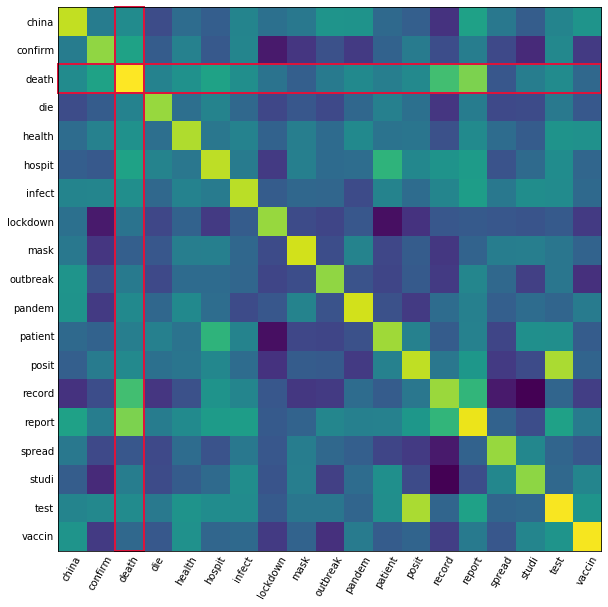

In [449]:
from sklearn.preprocessing import normalize
from matplotlib.patches import Rectangle
import seaborn as sns

labels = words_in_matrix
N = len(labels)

#####

Matlog = np.log(Mat)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(Matlog)

ax.set_yticks(range(len(words_in_matrix)))
ax.set_yticklabels(words_in_matrix)
ax.set_xticks(range(len(words_in_matrix)))
ax.set_xticklabels(words_in_matrix, rotation = 60)

wanted_label = 'death'
wanted_index = labels.index(wanted_label)
x, y, w, h = -0.5, wanted_index-0.5, N, 1
for _ in range(2):
    ax.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor='crimson', lw=2, clip_on=False))
    x, y = y, x # exchange the roles of x and y
    w, h = h, w # exchange the roles of w and h
ax.tick_params(length=0)

# Hide grid lines
ax.grid(False)

plt.show()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,9))

red = Color("dodgerblue")
colors_ = [c.hex for c in list(red.range_to(Color("hotpink"), len(token_names)))]

areas_ks = smooth_data.to_numpy().transpose()
ax.stackplot(x_period,*areas_ks, baseline='wiggle', colors=colors_, edgecolor = 'white')
ax.set_xlim(23,355)

plt.show()

In [ ]:

nrows=5
ncols=4

fig, ax = plt.subplots(nrows,ncols,figsize=(14,12))

Nobs = min(topww.shape[0], topww.shape[0])

y_rep = topww['mask'][:Nobs]
y_dem = topww1['mask'][:Nobs]

WORDS = controversy_topics
NEUTRALITY = {}
ij = 0
for i in range(nrows):
    for j in range(ncols):
        
        if(ij < 19):
        
            w_ij = WORDS[ij]
            y_rep = topww[w_ij][:Nobs]
            y_dem = topww1[w_ij][:Nobs]

            xy_upperlim = 1.01*max(y_rep + y_dem)
            xy_lowerlim = -0.05*xy_upperlim

            ax[i,j].text(xy_upperlim/2, xy_upperlim/2, w_ij, fontsize = 20)
            ax[i,j].plot([-300,300],[-300,300], c = 'grey')

            ax[i,j].scatter(x=y_rep, y=y_dem, s= 40)
            ax[i,j].set_xlim(xy_lowerlim,xy_upperlim)
            ax[i,j].set_ylim(xy_lowerlim,xy_upperlim)
            
            X_rep = np.array(y_rep).reshape(-1,1)
            reg = LinearRegression(fit_intercept = False).fit(X=X_rep, y=y_dem)
            R2 = reg.score(X=X_rep, y=y_dem)
            slope = reg.coef_[0]
            NEUTRALITY[w_ij] =  R2, np.exp(R2)*np.tanh(-(slope-1)) #tanh to make it symetric around 1

            ax[i,j].text(0.1*xy_upperlim, 0.8*xy_upperlim, str(round(R2,2)), fontsize = 20)
            ax[i,j].text(0.1*xy_upperlim, 0.4*xy_upperlim, str(round(slope,2)), fontsize = 20)
            ax[i,j].grid(False)       

            ij += 1
        

plt.show()

In [ ]:
items = [] # items for legend
lines ={} # bar-information for plotting
days = list(range(106))

rngsize = 10
TOOLS = "box_zoom,reset"

TOOLTIPS_title = """
    <div>
        <div>
            <span style="font-size: 15px; font-weight: bold;">@date</span>
        </div>
        <div style="width:200px; height: 30%;">
            <span style="font-size: 13px; color: #966;">@title</span>
        </div>
    </div>
"""

List_of_plots = []

datest['zero'] = 0
c1 = c1
c2 = '#7a28cb'
c3 = '#8C7284'
c4 = ''


impact_metric = 'num_comments'

for indx,i in enumerate(controversy_topics):
    
    smooth_i = '_'.join([i,'ks'])
    
    max_freq = 1.5*max(datest[i])
    min_freq = -0.5*max_freq
    med_freq = (max_freq + min_freq)/2
    
    min_x = -5
    max_x = 370
    
    p = figure(plot_width= 320, plot_height=80, title = None,
               x_range=(min_x,max_x), y_range = (min_freq,max_freq), tools = TOOLS)
    
    
    word_i = i
    titles_withword = dc19[['period',impact_metric,'title']].loc[dc19.tokens.apply(HasCOVIDword) == True]
    idx =titles_withword.groupby(['period'])[impact_metric].transform(max) == titles_withword[impact_metric]
    titles_withword = titles_withword[['period','title',impact_metric]][idx]
    titles_withword = titles_withword.set_index('period')
    
    #source = ColumnDataSource(data= datest.join(titles_withword, how='outer').reset_index())
    # Selecting the Nr relevant posts
    Nr = 10
    bsl = med_freq
    i_relevant = titles_withword.num_comments.nlargest(Nr).index
    df_relevant = datest.join(titles_withword, how='outer').reset_index().iloc[i_relevant]
    df_relevant['baseline'] = bsl
    source = ColumnDataSource(data= df_relevant)
    
    glyph_text = Text(x='x', y='y', text="text", text_baseline = 'middle', text_align = 'center',
                      angle=0., text_font_size = '48pt', text_color=c3, text_alpha = 0.6,
                      text_font_style = 'bold')
    
    
    ######
    # Creating background
#     p_bkg = p
#     p_bkg.add_glyph(ColumnDataSource(dict(x=[30*6], y=[med_freq], text=[i])), glyph_text)
    
#     p_bkg.xaxis.axis_label = ""
#     p_bkg.yaxis.axis_label = ""
#     p_bkg.xaxis.visible = False
#     p_bkg.yaxis.visible = False
#     p_bkg.yaxis.axis_line_width = 1
#     p_bkg.yaxis.ticker = [0,max_freq]
#     p_bkg.grid.visible = False
#     p_bkg.background_fill_alpha = 1
#     p_bkg.outline_line_color = None
#     p_bkg.border_fill_color = None    
#     p_bkg.background_fill_color = "seashell"
    
#     export_png(p_bkg, filename="./plot.png")
#     ######
    
# #    p.line(y=smooth_i, x='index', color=c2, source=source, alpha = 1, line_width = 3)
 
#     # Adding a background image
#     image_bkg = path.join('.','images',''.join(['wc1.png']))
#     image_bkg = './plot.png'
#     width_image = max_x - min_x
#     heigth_image = max_freq - min_freq
#     r_image = p.image_url(url=[image_bkg], x=min_x, y=min_freq, w=width_image, h=heigth_image,
#                           global_alpha = 1, anchor = 'bottom_left', dilate = True)
    
    
    # Timeline
    p.line(x=[1,365],y=[bsl,bsl], line_color = c3, line_width = 2)
    p.scatter(x=[1,365],y=[bsl,bsl], color = c3, line_color = c3, line_width = 2, angle =0)
     
    r = p.scatter(y='baseline', x='index', color=c1, source=source,
                  alpha = 1, size=16, marker = 'diamond', line_color = c3, line_width = 2)
    
    # curtain rectangle
    r_rect = p.rect(x=-100, y = -100, height = 1000, width = 1000, fill_color = 'white', fill_alpha = 1)
        
    r_text = p.add_glyph(ColumnDataSource(dict(x=[30*6], y=[med_freq], text=[i])), glyph_text) 
    
    
    hover1 = HoverTool(tooltips=TOOLTIPS_title,renderers = [r], mode = 'vline')
    hover2 = HoverTool(tooltips = None, renderers = [r_text], mode = 'mouse')
    hover3 = HoverTool(tooltips = None,renderers = [r_rect], mode = 'mouse')
    
    p.tools.append(hover1)
    p.tools.append(hover2)
    p.tools.append(hover3)

    selected_line = Line(line_alpha=0.8, line_color=c1, line_width = 3)
    selected_rect = Rect(fill_alpha=0., fill_color = 'white')
    selected_text = Text(text_alpha=0.3, text_font_size = '48pt', text_color = c3,
                         text_font_style = 'bold', text_baseline = 'middle', text_align = 'center')

    # I add the selection glyph because I want to fix a particular line for comparing
    #r.hover_glyph = selected_line
    r_text.hover_glyph = selected_text
    r_rect.hover_glyph = selected_rect
    
    # Adjusting plot parameters
    #p.x_range.range_padding = 0.05
    p.xaxis.axis_label = ""
    p.yaxis.axis_label = ""
    p.xaxis.visible = False
    p.yaxis.visible = False
    p.yaxis.axis_line_width = 1
    p.yaxis.ticker = [0,max_freq]
    p.grid.visible = False
    p.background_fill_alpha = 1
    
    p.outline_line_color = None
    p.border_fill_color = None
    
    p.background_fill_color = "seashell"
    
    List_of_plots.append(p)
    
    
p_all = gridplot(List_of_plots, ncols=3)

show(p_all)

In [252]:

smooth_data = datest[['_'.join([s,'ks']) for s in token_names]]

WORDS_IN_TOPIC = smooth_data.columns.tolist()

nweeks = smooth_data.shape[0]
items = [] # items for legend
bar ={} # bar-information for plotting
x_period = datest.index.to_numpy()

c11 = '#C398B7'
c1 = '#D2B2C9'

TOOLTIPS_line = """
    <div>
        <div>
            <span style="font-size: 14px;">@date</span>
        </div>
    </div>
"""

p = figure(plot_width=950, plot_height=500, title = '2020 word evolution',
           tools = 'hover', tooltips = TOOLTIPS_line, x_range=(1,365), x_axis_type = 'linear')


probs0 = [-x/2 for x in smooth_data.sum(axis=1).to_list()]
#probs0 = [0 for _ in smooth_data.sum(axis=1).to_list()]

for indx, wi in enumerate(token_names):
    
    word_i = '_'.join([wi,'ks'])
     # Selecting hour and probabilities for plotting category i
    probs1 = smooth_data[word_i].to_list()
    probs = [x[0] + x[1] for x in zip(probs1,probs0)]
     # adding bar for category i
    bar[word_i] = p.varea(x = list(x_period), y1 = probs0, y2 = probs, muted_color = c1, 
                          muted_alpha = 1,muted = True,
                          color = c1, alpha = 1, name = word_i)
    line1 = p.line(x_period, y = probs, line_color = 'white', line_width=2)
    
    
#     hover1 = HoverTool(tooltips=None,renderers = [bar[word_i]])
#     p.tools.append(hover1)
    
    selected_line = Line(line_color = 'white', line_width=2)
    selected_area = VArea(fill_alpha=1, fill_color = c11)

    # I add the selection glyph because I want to fix a particular line for comparing
    #bar[word_i].hover_glyph = selected_line
    line1.hover_glyph = selected_line
    bar[word_i].hover_glyph = selected_area
        
# Adding info of category i for the legend
    items.append((wi, [bar[word_i]]))
    
    probs0 = probs


# dftext=pd.DataFrame.from_dict({'day' : [40, 300], 'y' :[-0.15, 0.25], 'words' : ['china', 'vaccine'] })
# source_text = ColumnDataSource(dftext)
# glyph_text = Text(x='day', y='y', text="words", 
#                   x_offset = 10, y_offset = 10, 
#                   text_align = 'right', text_baseline = 'top', 
#                   angle=0, text_font_size = '14pt', text_color='black', text_alpha = 1, text_font_style = 'bold')
# r_text = p.add_glyph(source_text, glyph_text)
    

month_names = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

month_length = [31,28,31,30,31,30,31,31,30,31,30,31]
tick_months = [1] + list(np.cumsum(month_length))
x_major_ticknames = {int(j):x for j,x in zip(tick_months[:-1], month_names)}
x_major_ticknames[365] = ''
tick_minor = [(x + tick_months[i+1])/2 for i,x in enumerate(tick_months[:-1])]
x_minor_ticknames = {int(j):x for j,x in zip(tick_minor, month_names)}

    
#p.xaxis.axis_label = "Week of the year"
p.yaxis.visible = False
p.xaxis.visible = True
p.xaxis.ticker = list(x_minor_ticknames.keys())

for i, tick_i in enumerate(tick_months[:-1]):
    green_box = BoxAnnotation(left=tick_i, right=tick_months[i+1],
                              line_color = 'lightgrey', line_alpha = 1,
                              fill_color=None, fill_alpha=(i%2)*0.8,
                             level = 'underlay')
    p.add_layout(green_box)


 # Adusting legend information
#legend = Legend(items=items, location=(0, 10))
#p.add_layout(legend, 'right')
#p.legend.click_policy="hide"

p.xaxis.major_label_overrides = x_minor_ticknames
p.xaxis.axis_line_color = 'grey'
p.xaxis.axis_line_width = 1
p.xaxis.major_tick_line_color = 'grey'
p.xaxis.major_tick_line_width = 0
p.xaxis.major_label_standoff = -22
p.xaxis.major_label_text_color = 'grey'
p.xaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_size = '10pt'

p.grid.visible = False
p.background_fill_color = 'white'
p.background_fill_alpha = 1

p.outline_line_color = None
p.outline_line_dash = 'solid'
p.outline_line_width = 1
p.background_fill_color = 'seashell'
p.border_fill_color = None
        

show(p) 

In [243]:
tools_to_show = 'hover'

prep = figure(plot_width=1000, plot_height=250, title = None,
           tools = tools_to_show, tooltips = None, x_range=(1,360), x_axis_type = 'linear')

nf = dfrep.shape[0]/(dfrep.shape[0] + dfdem.shape[0])

smooth_data_rep = dfrep_agg[['_'.join([s,'ks']) for s in token_names]]

WORDS_IN_TOPIC = smooth_data_rep.columns.tolist()
bar ={} # bar-information for plotting
x_period_rep = smooth_data_rep.index.to_numpy()

probs0_rep = [-x/2 for x in smooth_data_rep.sum(axis=1).to_list()]
for indx, wi in enumerate(token_names):
    
    word_i = '_'.join([wi,'ks'])
    
    # Selecting hour and probabilities for plotting category i
    probs1_rep = smooth_data_rep[word_i].to_list()
    probs_rep = [max(x[0],0) + x[1] for x in zip(probs1_rep,probs0_rep)]

    bar[word_i] = prep.varea(x = list(x_period_rep), y1 = probs0_rep, y2 = probs_rep, muted_color = crep, 
                      muted_alpha = 0.7,muted = True,
                      color = crep, alpha = 1, name = word_i)
    
    selected_area = VArea(fill_alpha=1, fill_color = crep)
    bar[word_i].hover_glyph = selected_area
    probs0_rep = probs_rep

prep.yaxis.axis_label = None

prep.yaxis.ticker = [-10,0,10]

prep.grid.visible = False
prep.background_fill_color = 'white'
prep.background_fill_alpha = 1

prep.outline_line_color = None
prep.xaxis.visible = False
prep.background_fill_color = None
prep.border_fill_color = None


pdem = figure(plot_width=1000, plot_height=250, title = None,
           tools = tools_to_show, tooltips = None, x_range=(1,360), x_axis_type = 'linear')

nf = dfdem.shape[0]/(dfrep.shape[0] + dfdem.shape[0])

smooth_data_dem = dfdem_agg[['_'.join([s,'ks']) for s in token_names]]
probs0_dem = [-x/2 for x in smooth_data_dem.sum(axis=1).to_list()]
x_period_dem = smooth_data_dem.index.to_numpy()

for indx, wi in enumerate(token_names):
    
    word_i = '_'.join([wi,'ks'])

    probs1_dem = [x for x in smooth_data_dem[word_i].to_list()]
    probs_dem = [max(x[0],0) + x[1] for x in zip(probs1_dem,probs0_dem)]
     # adding bar for category i
    bar[word_i] = pdem.varea(x = list(x_period_dem), y1 = probs0_dem, y2 = probs_dem, muted_color = cdem, 
                          muted_alpha = 0.7,muted = True,
                          color = cdem, alpha = 1, name = word_i)
    selected_area = VArea(fill_alpha=1, fill_color = cdem)
    bar[word_i].hover_glyph = selected_area
    
    probs0_dem = probs_dem

pdem.yaxis.axis_label = None

pdem.yaxis.ticker = [-10,0,10]

pdem.grid.visible = False
pdem.background_fill_color = 'white'
pdem.background_fill_alpha = 1

pdem.outline_line_color = None
pdem.xaxis.visible = False
pdem.background_fill_color = None
pdem.border_fill_color = None
        

show(column(prep, pdem))

In [ ]:

class colormap_color_func(object):
    """Color func created from matplotlib colormap.

    Parameters
    ----------
    colormap : string or matplotlib colormap
        Colormap to sample from

    Example
    -------
    >>> WordCloud(color_func=colormap_color_func("magma"))

    """
    def __init__(self, colormap):
        import matplotlib.pyplot as plt
        self.colormap = plt.cm.get_cmap(colormap)

    def __call__(self, word, font_size, position, orientation,
                 random_state=None, **kwargs):
        if random_state is None:
            random_state = Random()
        r, g, b, _ = np.maximum(0, 255 * np.array(self.colormap(
            random_state.uniform(0, 1))))
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(r, g, b)
    

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

image_folder = '/home/jpre/Documents/DTU/COVIDpolitics2021/COVIDvsPOLITICS/images/'

for mci in controversy_topics:
    
    word_could_dict=Counter([mci])

    # The Symbola font includes most emoji
    font_path = path.join(d, 'fonts', 'GothamBold.ttf')
    wordcloud = WordCloud(width = 840, height = 240, background_color='white',
                          font_path = font_path, color_func=colormap_color_func("magma"),
                          min_font_size =60, max_font_size = 150).generate_from_frequencies(word_could_dict)
    
    plt.figure(figsize=(12,4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(path.join(d,'images',''.join(['wc_',mci,'.png'])), bbox_inches='tight')
    plt.close()